>Below is a copied and translated version of seaborn tutorial (v0.12.2) from the seaborn official docs.
>
>해당 내용은 seaborn 공식 문서에서 제공하는 seaborn 튜토리얼(v0.12.2)의 단순 필사 및 번역본입니다.  
>     
> © Copyright 2012-2022, Michael Waskom. (https://seaborn.pydata.org/tutorial.html#)

# 데이터의 분포 시각화
Visualizing distributions of data

데이터를 분석하거나 모델링하려면 먼저 변수가 어떻게 분포되어있는지 알아야합니다. 
데이터의 분포를 시각화하는 것만으로도 많은 중요한 의문점들이 해결될 수 있습니다 :  
관찰범위(range of distribution), 주요 경향(centural tendancy), 한 쪽으로 치우쳐져 있는지(왜도; heavily skewed)?, 다봉분포(bimodality)인지?, 이상치(outlier)가 있는지?, 혹은 이런 질문들의 답이 변수의 하위집단에 따라 달라지는지?  
<br>
[분포모듈(distribution module)](https://seaborn.pydata.org/api.html#distribution-api)은 이런 질문들에 대한 답을 줄 수 있게 디자인되어 있습니다. 
axes-level function (`histplot()`, `kdeplot()`, `ecdfplot()`, `rugplot()`)이 figure-level function (`displot()`, `jointplot()`, `pariplot()`)과 함께 그룹화됩니다.  
<br>
분포를 시각화하는 데에는 여러 방법이 있고, 각 방법마다 장단점이 있습니다. 
이 특성과 요소를 이해해서 목적에 가장 적합한 접근방식을 선택하는 것이 중요합니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

## 1. 단일변수 히스토그램 플롯
Plotting univariate histograms

분포를 시각화하는 가장 일반적인 방식은 아마 히스토그램(histogram)일 것입니다. 

히스토그램(histogram)은 분포를 시각화하는 가장 일반적인 방법입니다. 그리고 `displot()`에서는 `histplot()`과 같은 코드를 사용하여 기본 접근 방식으로 histogram을 그립니다. 
histogram은 bar plot과 같이 생겼습니다. 차이점은 여기서는 변수를 나타내는 축이 불연속 구간(bins)으로 나뉘고, 해당 구간의 관측 횟수(observation count)가 bar의 높이가 된다는 것입니다.

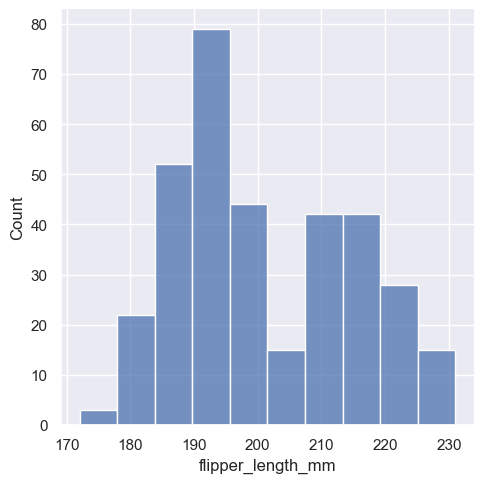

In [2]:
penguins = sns.load_dataset('penguins')
sns.displot(penguins, x='flipper_length_mm');

이 플롯은 `flipper_length_mm` 변수에 대한 몇가지 인사이트를 바로 제공합니다. 예를 들어, 가장 흔한 flipper 길이가 195mm 정도이고, 분포가 bimodal(봉이 2개인 것)로 나타나는 것으로 보아, 이 195mm 라는 수치가 전체 데이터를 대표한다고 말하기는 어렵습니다.

### 구간분할 사이즈 선택
Choosing the bin size

bin의 크기는 중요한 parameter 입니다. bin의 크기를 잘못 설정하면 데이터의 중요한 특징(feature)가 가려지거나, 임의의 변동성으로 인한 경향성(apparent feature)이 생겨서 오해의 소지가 생길 수 있습니다. 
displot() 과 histplot()은 default로 데이터의 분산(variance)과 관측횟수를 기준으로 bin size를 결정합니다. 
하지만 이런 기본설정은 특정 가정에 기반한 것이기 때문에 너무 의존해서는 안됩니다. 
항상 다양한 bin size로 분포를 보며 일관성이 있는지 확인해야합니다. 
bin size를 직접 설정하려면 `binwidth` parameter를 사용하세요 :

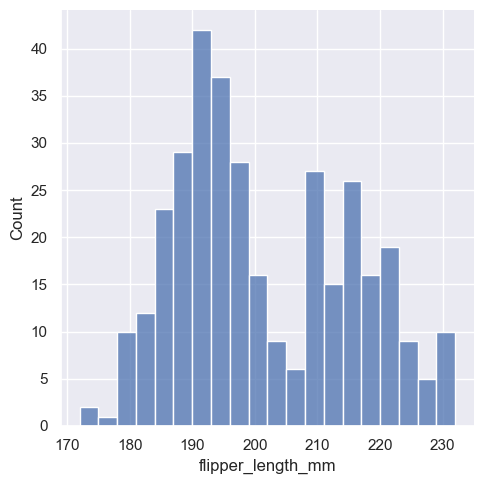

In [3]:
sns.displot(penguins, x='flipper_length_mm', binwidth=3);

상황에 따라서, 'bin size'보다는 'bin의 개수'를 지정하는게 더 직관적일 수 있습니다.

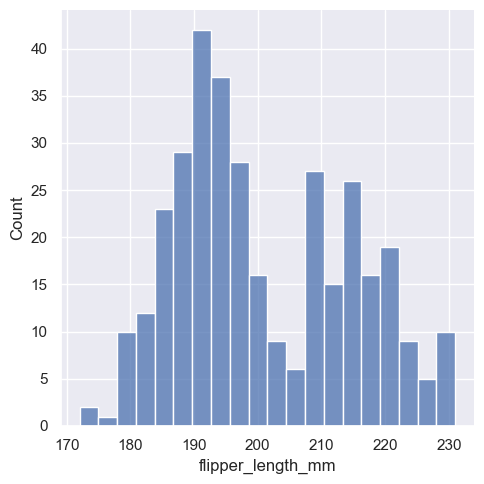

In [4]:
sns.displot(penguins, x='flipper_length_mm', bins=20);

위에서 언급한 기본설정(default)이 잘 작동하지 않는 예로는, 변수가 상대적으로 적은 수의 정수 값을 사용하는 경우가 있습니다. 이러면 bin width가 너무 작아져서 분포에 빈 공간(awkward gaps)이 생깁니다.

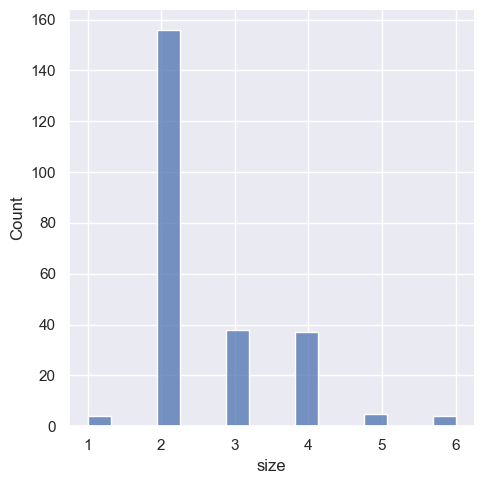

In [5]:
tips = sns.load_dataset('tips')
sns.displot(tips, x='size');

이럴 경우 `bins`에 배열(array)를 전달해서 정확하게 분할되는 구간(bin breaks)을 지정하여 해결할 수 있습니다.

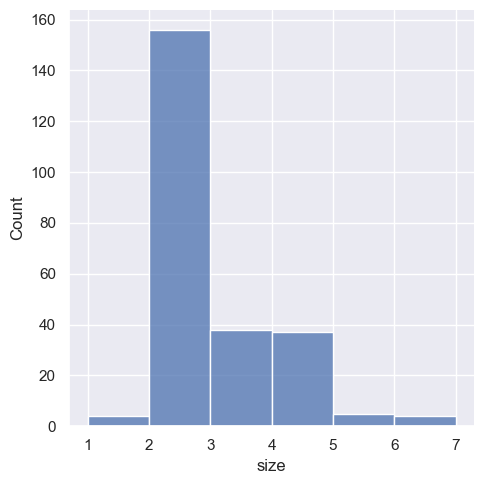

In [6]:
sns.displot(tips, x='size', bins=[1, 2, 3, 4, 5, 6, 7]);

혹은 `discrete=True`로 설정해서 해결할 수도 있습니다. 이러면 데이터셋에서 고유 값(unique value)들을 찾아서 구간을 분할하고, bar를 각 value의 중심에 위치시킵니다.

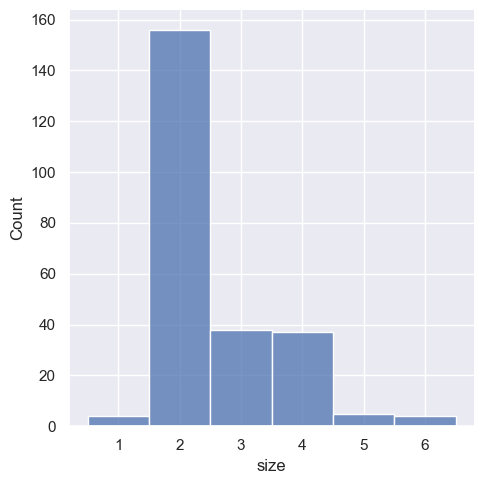

In [7]:
sns.displot(tips, x='size', discrete=True);

histogram의 로직으로 범주형(categorical) 변수의 분포를 시각화할 수도 있습니다. 
범주형 변수의 경우 discrete bins(불연속형 구간)이 자동 설정되지만, 범주형이라는 것을 강조하기 위해서 약간 '폭을 축소(shrink)'하는 것을 추천합니다.

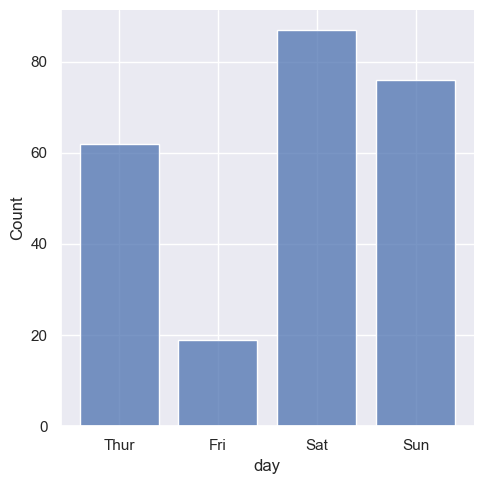

In [8]:
sns.displot(tips, x='day', shrink=.8);

### 
Conditioning on other variables

어떤 변수의 분포에 대해 이해했다면, 다음으로는 그 분포가 다른 변수들에 따라서는 어떻게 달라지는지를 봐야 합니다. 
예를 들어, 위에서 봤던 flipper length 분포의 bimodal(봉이 2개인 것)을 설명할 수 있는게 있을까요? 
`displot()`과 `histplot()`에서는 `hue` semantic 으로 조건에 따라 데이터를 나누어 볼 수 있습니다. 
`hue`에 변수를 할당하면 그 변수의 고유 값(unique value)에 따라 다른 색상을 가진 별도의 histogram 으로 그려집니다 :

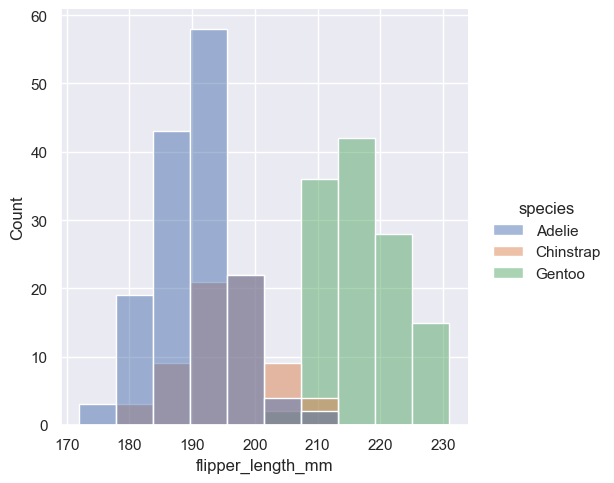

In [11]:
sns.displot(penguins, x='flipper_length_mm', hue='species');

혹은, 각각의 bar를 따로 그리지(layering) 않고, 쌓아올릴(stacked; moved vertically) 수도 있습니다. 이럴 경우, plot의 외곽선이 변수를 하나만 사용했을 때의 것과 일치하게 됩니다. :

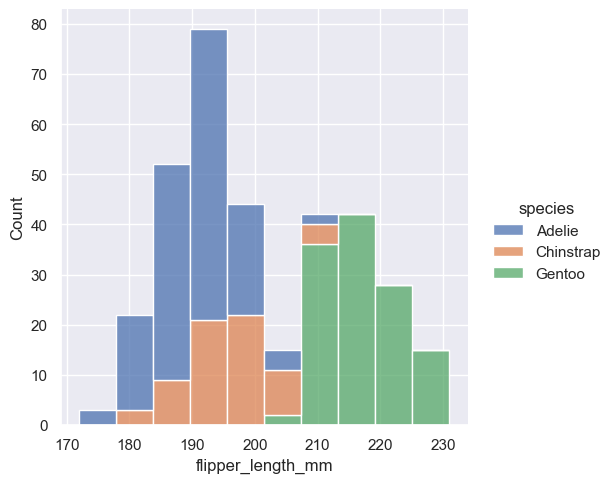

In [21]:
sns.displot(penguins, x='flipper_length_mm', hue='species', multiple='stack');

stacked histogram 은 변수간의 부분-전체 관계를 강조하여 보여주지만, 다른 특성(feature)들을 가려버릴 수 있습니다. 예를 들어, 분포에서 최빈값(mode)를 찾기가 어려워집니다.  
  
다른 방법으로는 변수에 따라 분리된 bar를 수평(horizontally)으로 옮기고 폭을 줄이는 'dodge'가 있습니다. 이러면 bar끼리 겹쳐지지 않아서 높이로 비교하기 쉽습니다. 하지만 범주형 분수가 작은 수의 level만을 가지고 있을 때만 잘 작동합니다 :

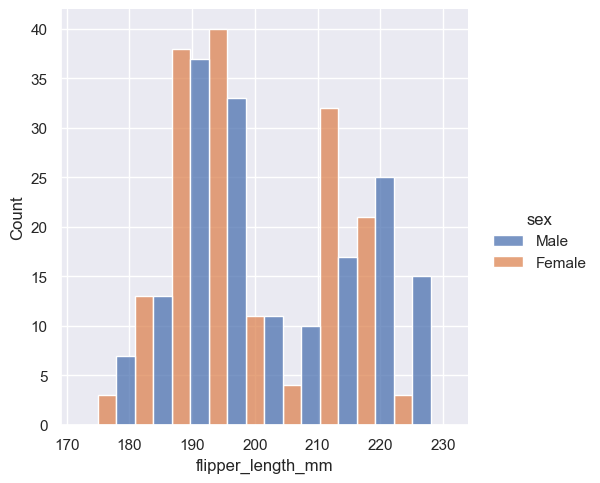

In [24]:
sns.displot(penguins, x='flipper_length_mm', hue='sex', multiple='dodge');

`displot()`은 `FacetGrid`에 그려지는 figure-level function입니다. 그렇기 때문에 `hue`가 아닌 `col`이나 `row`에 두번째 변수를 할당(assign)해서 각각의 분리된 분포를 subplot으로 그릴 수도 있습니다. 이러면 각각의 부분(subset) 분포는 잘 나타내지만, 부분분포끼리 비교하기는 어려워집니다 :

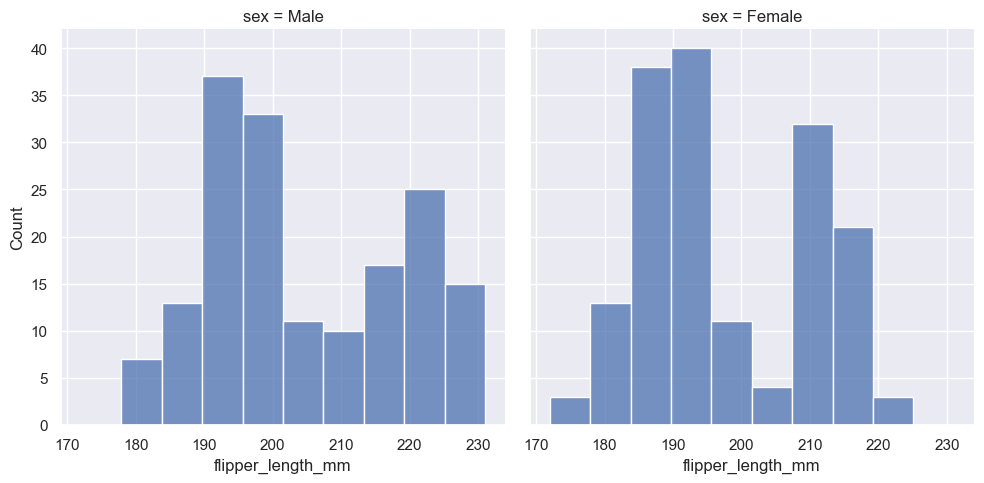

In [30]:
sns.displot(penguins, x='flipper_length_mm', col='sex');

위에서 알아본 방법들(hue semantic, multiple=stack/dodge, col/row semantic)모두 완벽하지는 않습니다. 뒤에서는 histogram 보다 '비교'에 더 적절한 방법들을 살펴보겠습니다.

### 정규화된 히스토그램 통계
Normalized histogram statistics

하위집단(subset)의 크기가 다른 경우 분포를 개수(count)로 표현해서는 잘 비교하지 못할 수 있습니다. 이럴 경우 `stat` parameter를 사용해서 count를 정규화(normalize)하는 방법이 있습니다.

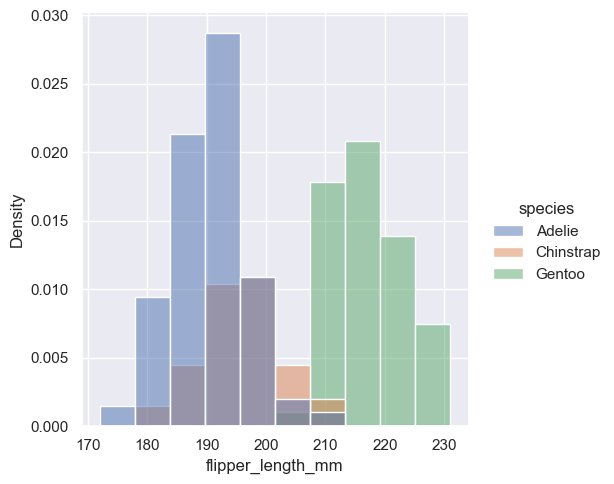

In [31]:
sns.displot(penguins, x='flipper_length_mm', hue='species', stat='density');

이 기능은 default로 전체 분포에 정규화를 적용시키기 때문에 bar의 높이가 재조정(rescale)되기만 합니다. 각 하위집합을 독립적으로 정규화시키려면 `common_norm=False`로 설정해주면 됩니다.

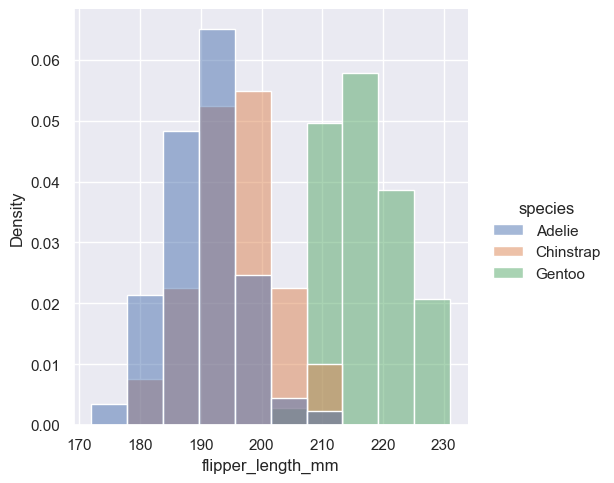

In [33]:
sns.displot(penguins, x='flipper_length_mm', hue='species', 
            stat='density', common_norm=False);

밀도 정규화(densirt normalization)는 막대의 크기를 조정하여 영역의 합이 1이 되도록 합니다. 즉, 밀도의 축을 집접 해석할 수는 없습니다.  
또 다른 옵션은 막대의 높이가 1이 되도록 정규화하는 것입니다. 이 옵션은 모든 히스토그램에 사용가능하지만, 변수가 불연속일 때 가장 적합합니다.

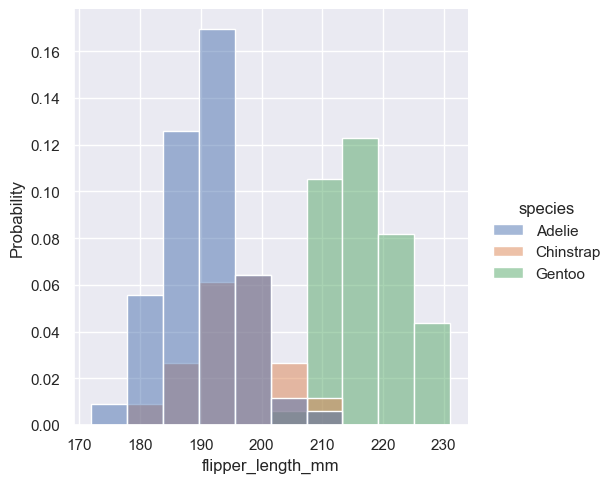

In [36]:
sns.displot(penguins, x='flipper_length_mm', hue='species', stat='probability');